Some of the more common predictive algorithms are:

1. Random Forest: This algorithm is derived from a combination of decision trees, none of which are related, and can use both classification and regression to classify vast amounts of data.
2. Generalized Linear Model (GLM) for Two Values: This algorithm narrows down the list of variables to find “best fit.” It can work out tipping points and change data capture and other influences, such as categorical predictors, to determine the “best fit” outcome, thereby overcoming drawbacks in other models, such as a regular linear regression.
3. Gradient Boosted Model: This algorithm also uses several combined decision trees, but unlike Random Forest, the trees are related. It builds out one tree at a time, thus enabling the next tree to correct flaws in the previous tree. It’s often used in rankings, such as on search engine outputs.
4. K-Means: A popular and fast algorithm, K-Means groups data points by similarities and so is often used for the clustering model. It can quickly render things like personalized retail offers to individuals within a huge group, such as a million or more customers with a similar liking of lined red wool coats.
5. Prophet: This algorithm is used in time-series or forecast models for capacity planning, such as for inventory needs, sales quotas and resource allocations. It is highly flexible and can easily accommodate heuristics and an array of useful assumptions.

In [1]:
# Importing the modules

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot

In [2]:
# Importing the data

data = pd.read_csv(r"Maintenance.csv")

In [3]:
# data head 

data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# checking the data shape

data.shape

(10000, 14)

In [5]:
# checking the data types of the data 

data.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [6]:
# Checking the null values

data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
corr = data.corr()

corr

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


<IPython.core.display.Javascript object>

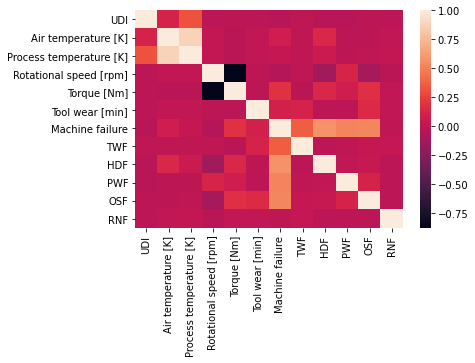

In [8]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [9]:
data.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [10]:
# Object Data

object_data = [column for column in data if data[column].dtypes=='object']

object_data

['Product ID', 'Type']

In [11]:
# int Data 

int_data = [column for column in data if data[column].dtypes=='int64' ]

int_data

['UDI',
 'Rotational speed [rpm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [12]:
# float Data 

float_data = [column for column in data if data[column].dtypes=='float64' ]

float_data

['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]']

In [13]:
# checking the unique data types of the data

data['Product ID'].unique()

array(['M14860', 'L47181', 'L47182', ..., 'M24857', 'H39412', 'M24859'],
      dtype=object)

In [14]:
data['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [15]:
type_dict = {'M': 0, 'L': 1, 'H':2}

data['Type'] = data['Type'].map(type_dict)

In [16]:
data.dtypes

UDI                          int64
Product ID                  object
Type                         int64
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [17]:
# make column index

data.set_index('UDI', inplace=True)

In [18]:
data.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [19]:
data_product_id_unique = list(data['Product ID'].unique())

len(data_product_id_unique)

10000

In [20]:
data = data.drop(labels='Product ID', axis=1)

In [21]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,
1,0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

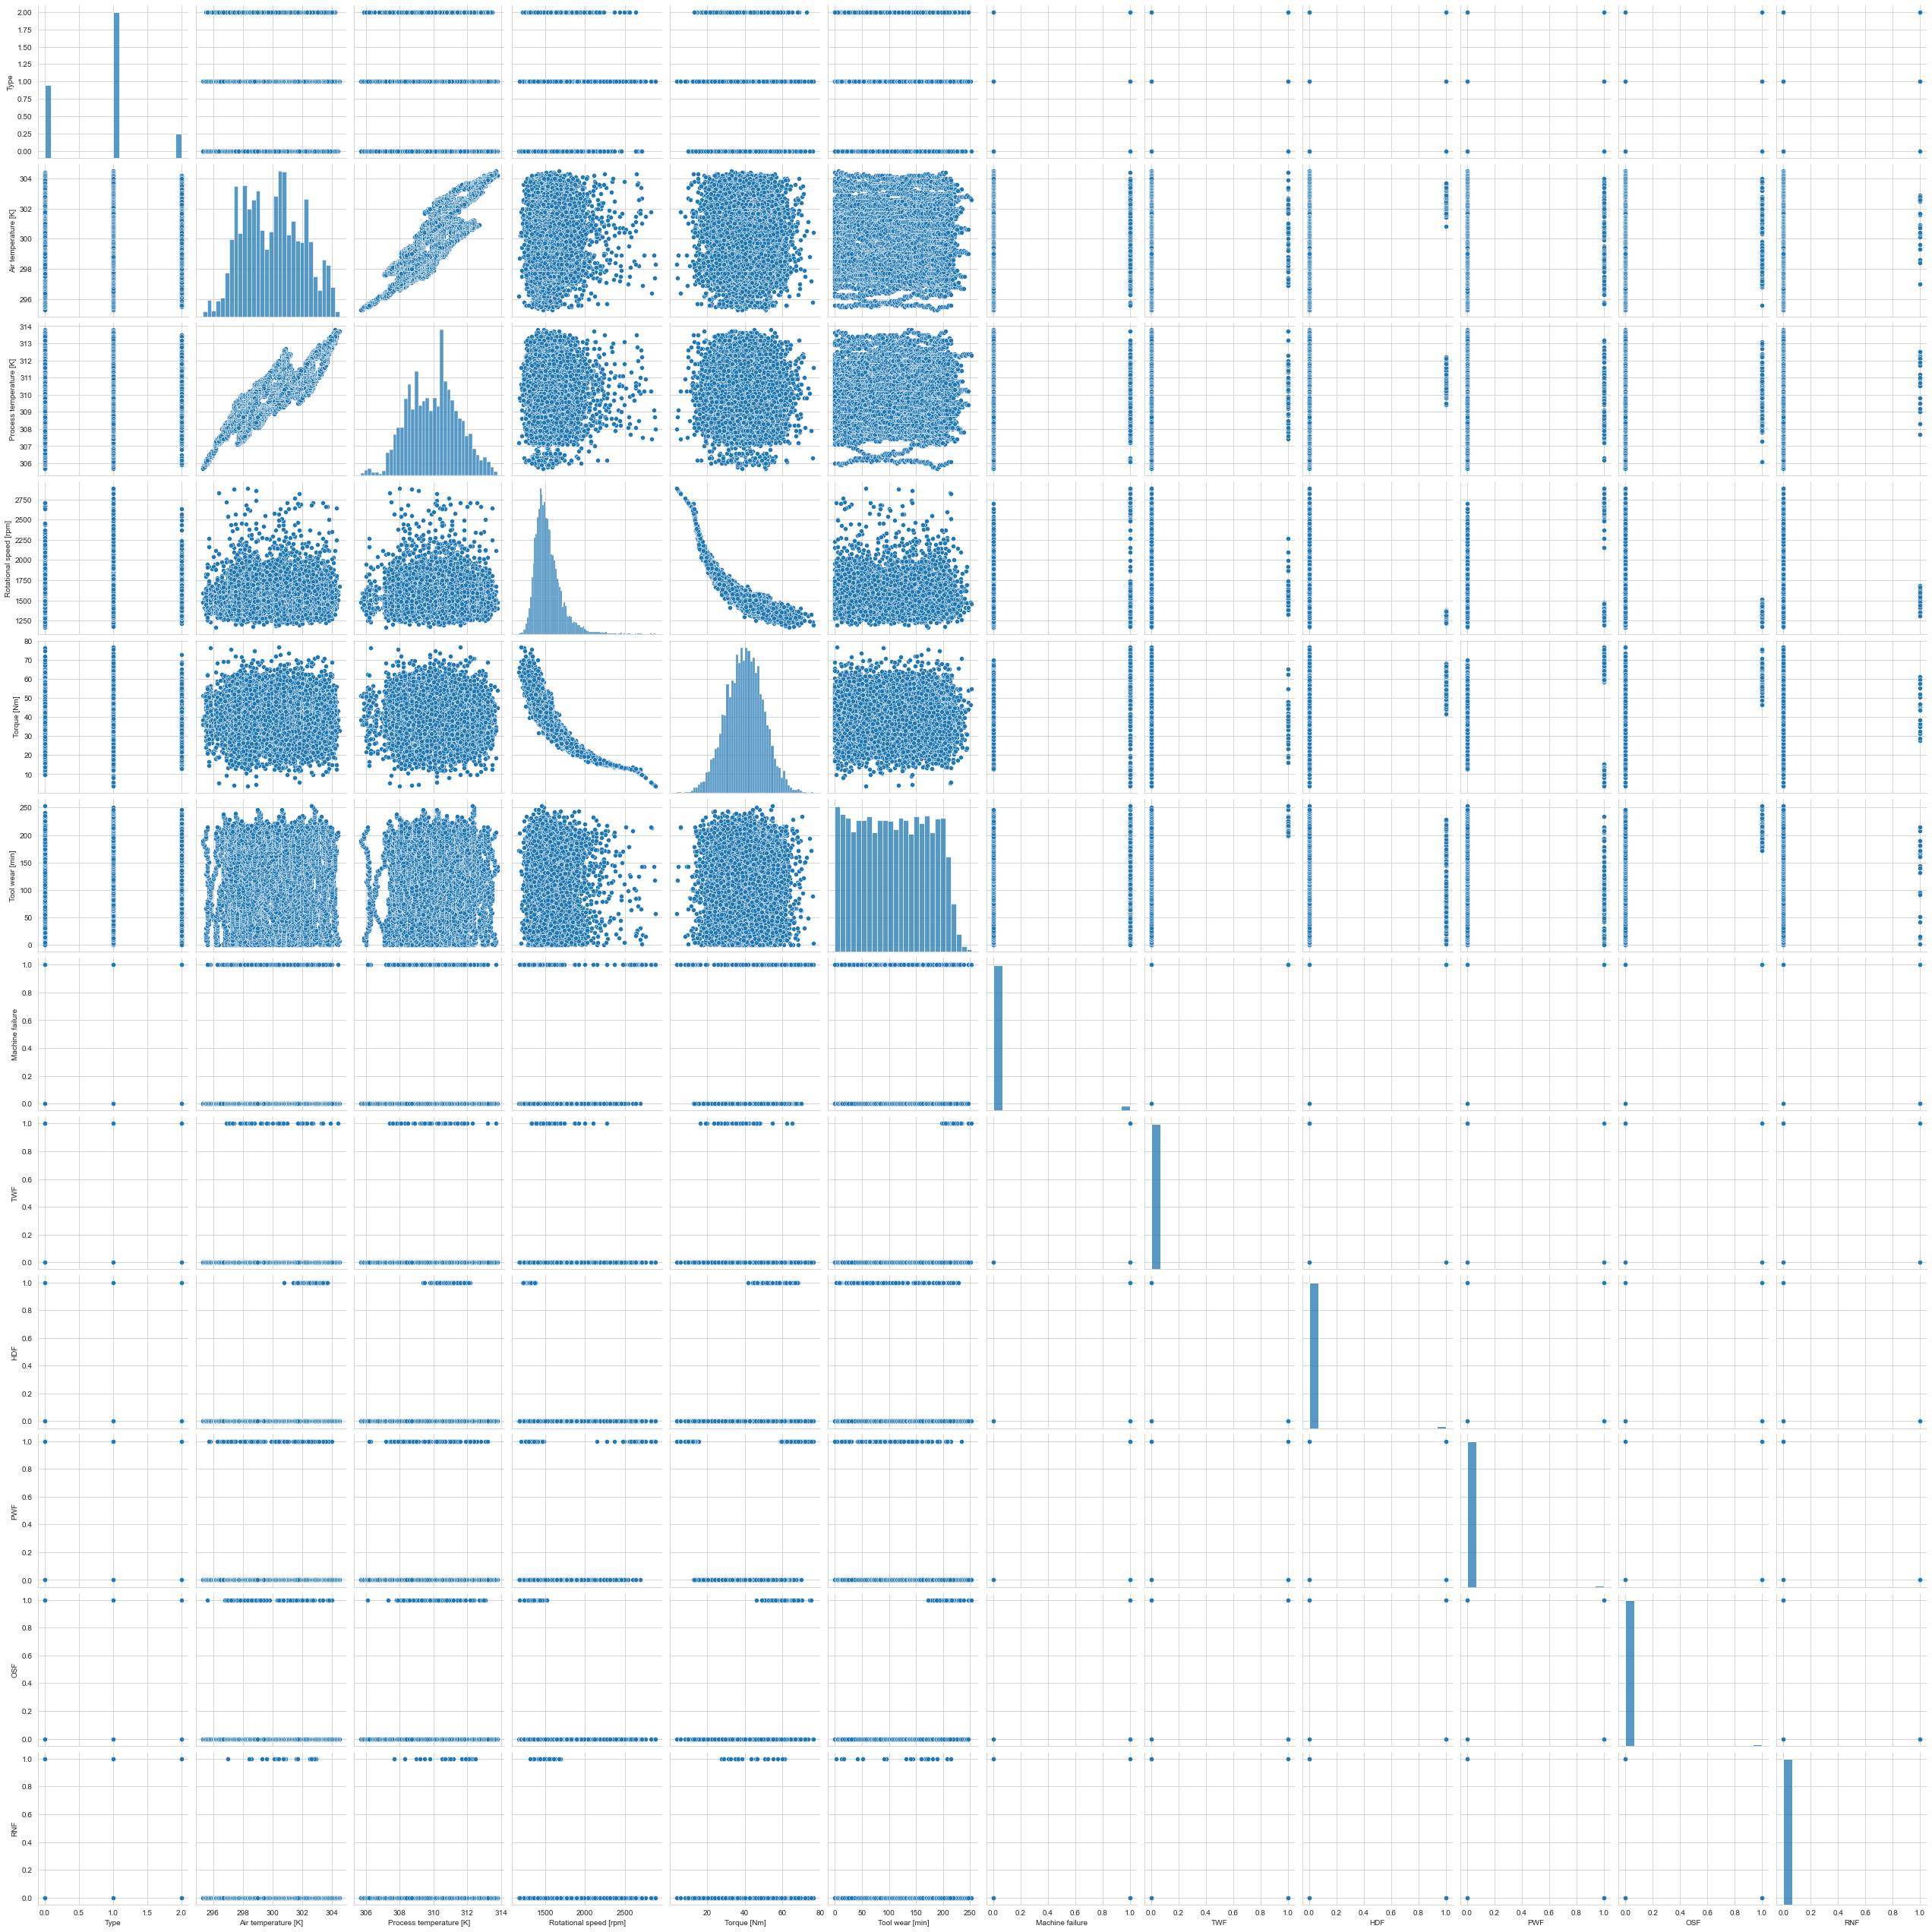

In [22]:
sns.set_style("whitegrid");
sns.pairplot(data, size=3);
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

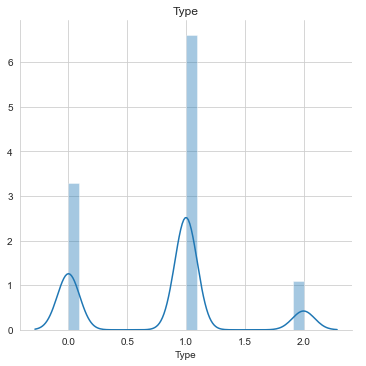

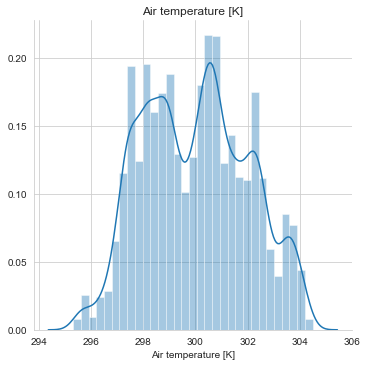

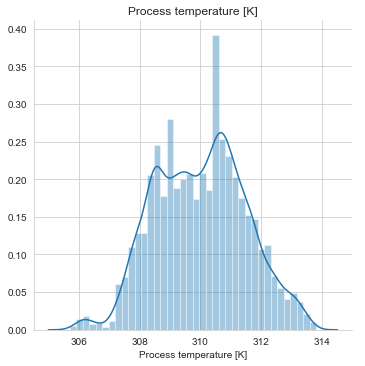

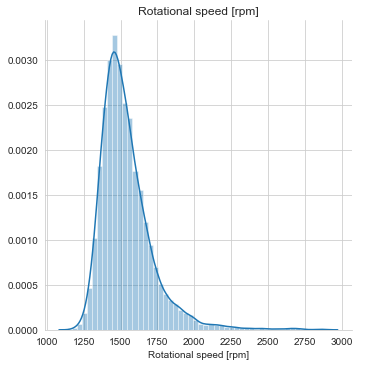

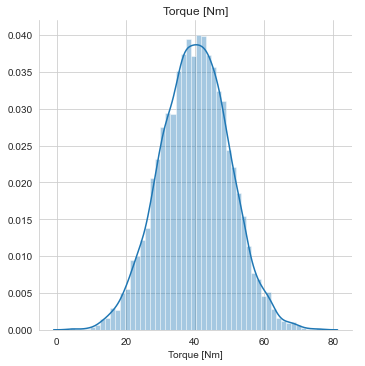

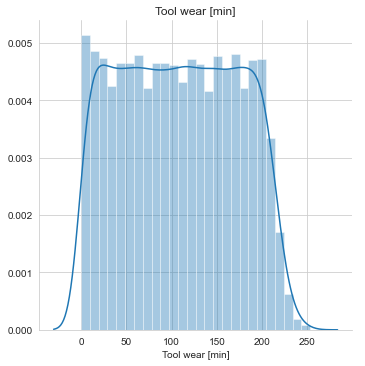

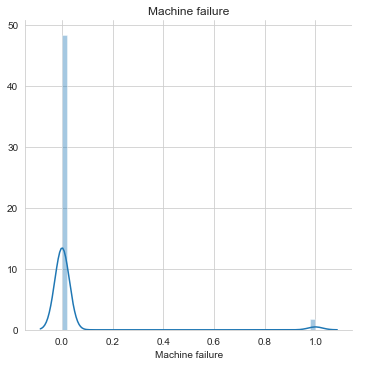

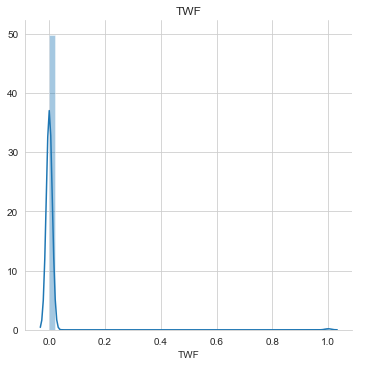

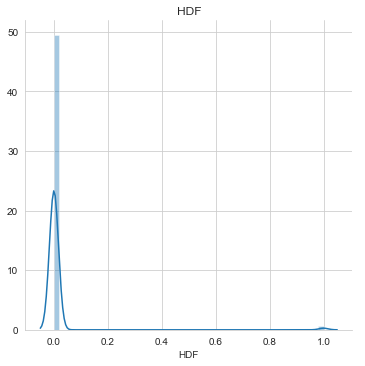

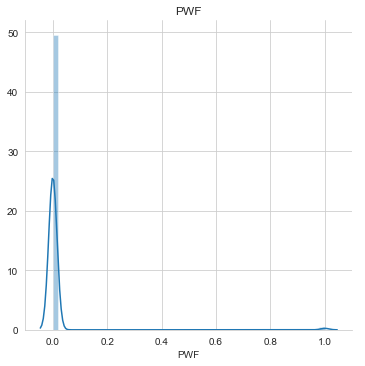

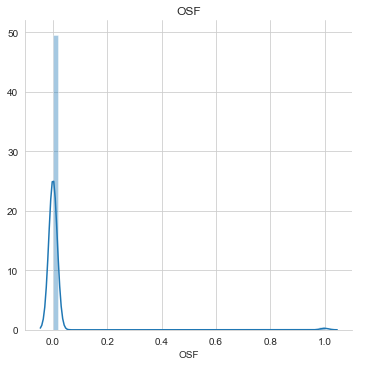

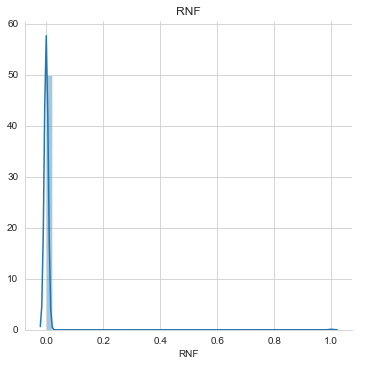

In [23]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# checking the distplot for the all variables
for column in data :
    sns.FacetGrid(data,height=5).map(sns.distplot,column).add_legend()
    plt.title(column)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = data.drop(labels='Machine failure', axis=1)
y = data['Machine failure']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [27]:
discrete_features = x.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def mutual_information_score(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = mutual_information_score(x, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

Torque [Nm]                0.042469
Rotational speed [rpm]     0.033017
Tool wear [min]            0.022159
Process temperature [K]    0.002248
Name: MI Scores, dtype: float64

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

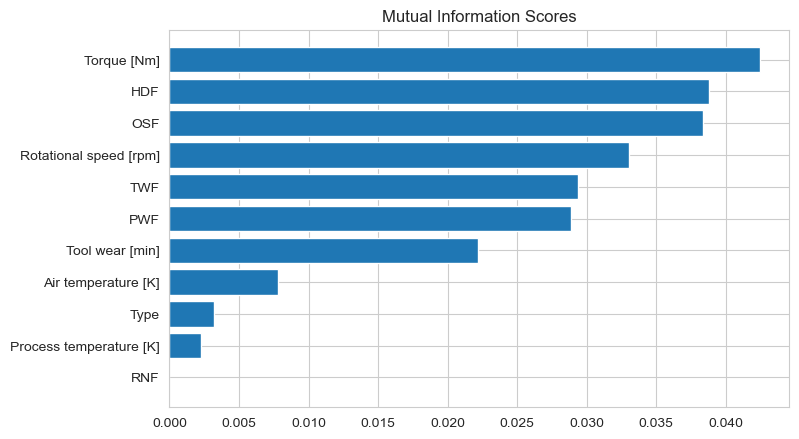

In [28]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [31]:
len(x.columns)


11

In [32]:
# Model Building 

classifier = Sequential()
classifier.add(Dense(6, kernel_initializer = "uniform",activation = "relu", input_dim=11))
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))
classifier.compile(optimizer= "rmsprop",loss = "binary_crossentropy",metrics = ["accuracy"])
history = classifier.fit(X_train, y_train, epochs = 3, validation_split=0.5)

Epoch 1/3
110/110 [==============================] - 1s 3ms/step - loss: 0.6528 - accuracy: 0.9794 - val_loss: 0.6104 - val_accuracy: 0.9980
Epoch 2/3
110/110 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.9994 - val_loss: 0.5063 - val_accuracy: 0.9989
Epoch 3/3
110/110 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.9997 - val_loss: 0.3993 - val_accuracy: 0.9989


In [33]:
y_pred = classifier.predict(X_test)

y_pred

array([[0.41711372],
       [0.22725308],
       [0.41711372],
       ...,
       [0.28770941],
       [0.4081493 ],
       [0.23003095]], dtype=float32)

In [34]:
y_pred = (y_pred > 0.5)

y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[2901,    0],
       [   4,   95]], dtype=int64)

In [36]:
x.iloc[0].values

array([   0. ,  298.1,  308.6, 1551. ,   42.8,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ])

In [37]:
new_pred = classifier.predict(sc.transform(np.array([[0, 298.1, 308.6, 1551, 42.8, 0, 0, 0, 0, 0, 0]])))


C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
new_pred = (new_pred > 0.5)
new_pred

array([[False]])

In [39]:
from sklearn.metrics import accuracy_score
print('Accuracy :',accuracy_score(y_test, y_pred)*100, '%')

Accuracy : 99.86666666666667 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

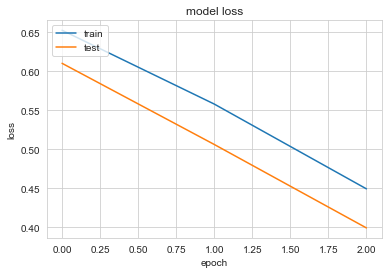

In [40]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

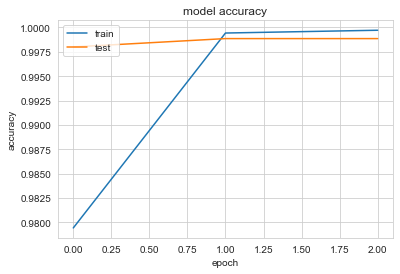

In [41]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()